### Machine Learning Capstone Project
#### Project : Recognizing hardwritten digits

    In this project we will discover the MNIST handwritten digit recognition problem and we will develop a deep learning model in Python using the Keras library that will be capable of achieving excellent results. Now some questions come to mind:

    What is deep learning ?
    Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.
    Why we are using keras ?
    Keras is one of the best neural network Frameworks currently around. Here are the main advantages I see for it:
        Simplicity (code itself is very good)
        Awesome community - there is good documentation, lots of community code, it is also the framework of choice for many Kagglers nowadays meaning you can get a constant stream of some really insightful data science competition grade code written in keras.
        Very active development.
    What is MNIST handwritten digit recognition problem ?
    The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset. Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. In this tutorial, we’ll give you a step by step walk-through of how to build a hand-written digit classifier using the MNIST dataset. For someone new to deep learning, this exercise is arguably the “Hello World” equivalent. It consists of 70,000 labeled 28x28 pixel grayscale images of hand-written digits. The dataset is split into 60,000 training images and 10,000 test images. There are 10 classes (one for each of the 10 digits). The task at hand is to train a model using the 60,000 training images and subsequently test its classification accuracy on the 10,000 test images.

Let's Start

Let's start by importing numpy and setting a seed for the computer's pseudorandom number generator. This allows us to reproduce the results from our script:


In [1]:
# import numpy
import numpy as np

np.random.seed(10)  # for reproducibility

In [2]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist  # Dataset is in built with the tensorflow
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

In [3]:
print(tf.__version__)

2.5.0


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# We can use this code block for pltting

In [5]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [7]:
# If we observe the input shape, its of 2 dimensional vector
# For each image we have a (28*28) vector
# We will convert the (28*28) vector into single dimensional vector of 1 * 784   (3D to 2D)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [8]:
# After converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [9]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
# If we observe the above matrix each cell is having a value between 0-255
# Before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255    
X_test = X_test/255    

# The lowest value is (white=0) and highest is (black=255), we need to scale between 0 to 1
# Scaling the test data in range 0 to 1

In [11]:
# Here we are having a class number for each image
print("Class label of first image :", y_train[0])

# Need to convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# This conversion is needed for MLPs 
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

In [13]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 50

### Precision, recall and F1 score calculation :

In [14]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))    # Formula for F1 score calculation

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

In [15]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', f1_m])
history = model.fit(X_train, Y_train, steps_per_epoch=500, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Epoch 1/50
500/500 [==============================] - 2s 2ms/step - loss: 1.2604 - accuracy: 0.7020 - f1_m: 0.3630 - val_loss: 0.7913 - val_accuracy: 0.8349 - val_f1_m: 0.6956
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.7007 - accuracy: 0.8413 - f1_m: 0.7648 - val_loss: 0.5942 - val_accuracy: 0.8638 - val_f1_m: 0.8147
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.8602 - f1_m: 0.8262 - val_loss: 0.5155 - val_accuracy: 0.8739 - val_f1_m: 0.8477
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.8699 - f1_m: 0.8504 - val_loss: 0.4713 - val_accuracy: 0.8802 - val_f1_m: 0.8647
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.8765 - f1_m: 0.8624 - val_loss: 0.4426 - val_accuracy: 0.8860 - val_f1_m: 0.8760
Epoch 6/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4558 - accuracy: 0.8814 - f1_m: 0.8704 - val

500/500 [==============================] - 1s 2ms/step - loss: 0.3095 - accuracy: 0.9139 - f1_m: 0.9140 - val_loss: 0.2982 - val_accuracy: 0.9179 - val_f1_m: 0.9173
Epoch 48/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.9144 - f1_m: 0.9143 - val_loss: 0.2974 - val_accuracy: 0.9182 - val_f1_m: 0.9172
Epoch 49/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3080 - accuracy: 0.9147 - f1_m: 0.9145 - val_loss: 0.2969 - val_accuracy: 0.9183 - val_f1_m: 0.9175
Epoch 50/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.9150 - f1_m: 0.9147 - val_loss: 0.2964 - val_accuracy: 0.9182 - val_f1_m: 0.9176


#### Result summary:

    Optimizer = 'sgd' ,
    input activation function = 'softmax',
    Model accuracy = 91.82%
    F1 score = 91.76%

### What is a dense layer?

    Dense layer is the regular deeply connected neural network layer.
    It is most common and frequently used layer.
    Dense layer does the below operation on the input and return the output.
        output = activation(dot(input, kernel) + bias)
    output = f((w_T.x)+b)
    b = bias , f = activation function , (w_T . x) = transpose(w).x = dot(weight associated with x and data point x)

eg : A Dense(10) has ten neurons. A Dense(512) has 512 neurons.


Test score: 0.29641464352607727
Test accuracy: 0.9182000160217285


<IPython.core.display.Javascript object>


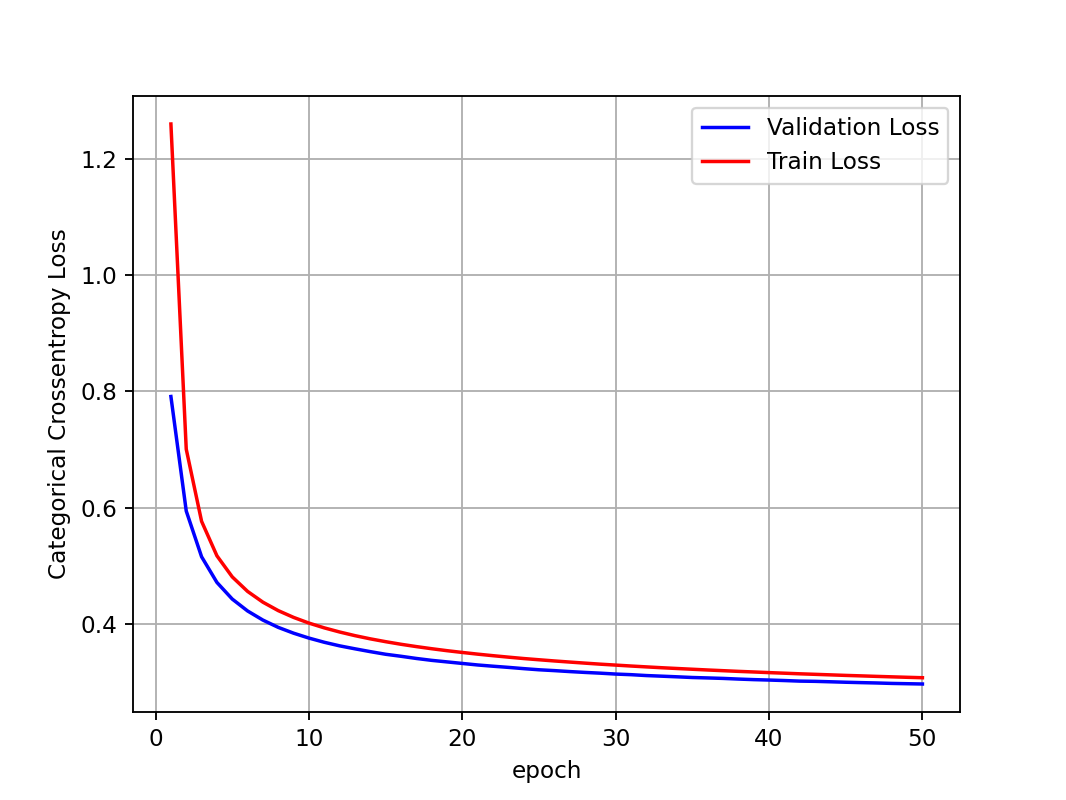

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### MLP + Sigmoid activation + SGDoptimizer

In [17]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))  # Here there are 512 neurons
model_sigmoid.add(Dense(128, activation='sigmoid'))                            # Here there are 128 neurons
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy',f1_m])
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 2.2657 - accuracy: 0.2104 - f1_m: 0.0000e+00 - val_loss: 2.2186 - val_accuracy: 0.3570 - val_f1_m: 0.0000e+00
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 2.1724 - accuracy: 0.4482 - f1_m: 0.0000e+00 - val_loss: 2.1124 - val_accuracy: 0.5970 - val_f1_m: 0.0000e+00
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 2.0496 - accuracy: 0.5734 - f1_m: 0.0000e+00 - val_loss: 1.9636 - val_accuracy: 0.6578 - val_f1_m: 0.0000e+00
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 1.8766 - accuracy: 0.6356 - f1_m: 1.3223e-04 - val_loss: 1.7608 - val_accuracy: 0.6703 - val_f1_m: 0.0020
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 1.6572 - accuracy: 0.6776 - f1_m: 0.0312 - val_loss: 1.5236 - val_accuracy: 0.7231 - val_f1_m: 0.0821
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 1.4250 - accuracy:

469/469 [==============================] - 2s 4ms/step - loss: 0.3350 - accuracy: 0.9039 - f1_m: 0.9047 - val_loss: 0.3209 - val_accuracy: 0.9078 - val_f1_m: 0.9078
Epoch 48/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3328 - accuracy: 0.9044 - f1_m: 0.9056 - val_loss: 0.3187 - val_accuracy: 0.9068 - val_f1_m: 0.9082
Epoch 49/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3307 - accuracy: 0.9047 - f1_m: 0.9058 - val_loss: 0.3169 - val_accuracy: 0.9072 - val_f1_m: 0.9082
Epoch 50/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3287 - accuracy: 0.9051 - f1_m: 0.9067 - val_loss: 0.3154 - val_accuracy: 0.9078 - val_f1_m: 0.9089


### Categorical crossentropy :

    We check how different is an instance as compared to another for a classification task.
    The categorical crossentropy is well suited to classification tasks, since one example can be considered to belong to a specific category with probability 1, and to other categories with probability 0.

#### Result summary:

    Optimizer = 'sgd' ,
    Input activation function = 'sigmoid',
    Output activation function = 'softmax' ,
    Model accuracy = 90.78
    F1 score = 90.89%



Test score: 0.31543245911598206
Test accuracy: 0.907800018787384


<IPython.core.display.Javascript object>


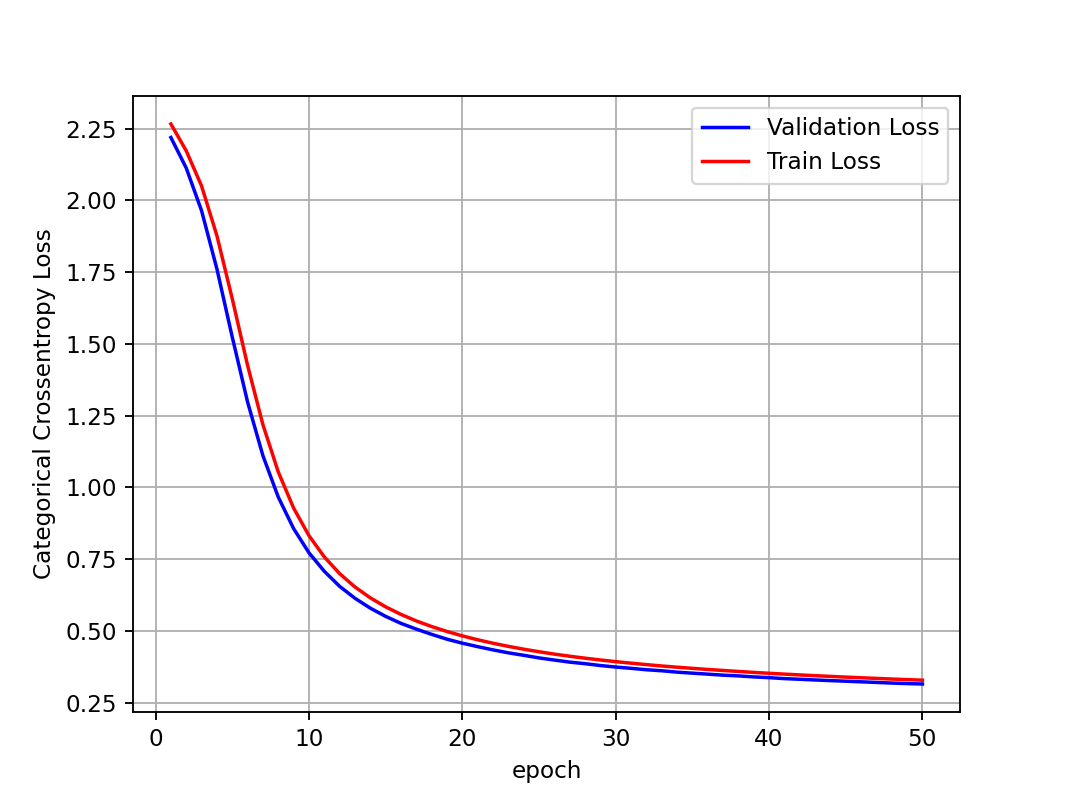

In [19]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


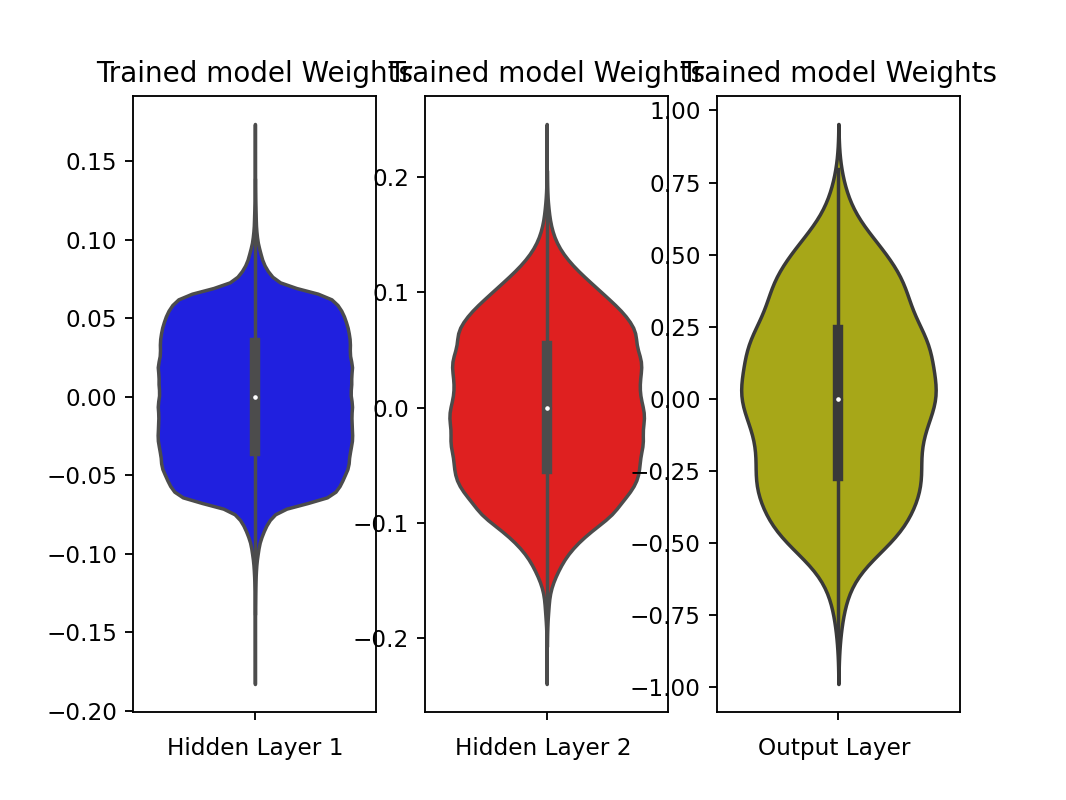

In [20]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Sigmoid activation + softmax

In [21]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.5300 - accuracy: 0.8616 - f1_m: 0.8008 - val_loss: 0.2522 - val_accuracy: 0.9264 - val_f1_m: 0.9271
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2222 - accuracy: 0.9341 - f1_m: 0.9351 - val_loss: 0.1901 - val_accuracy: 0.9427 - val_f1_m: 0.9434
Epoch 3/50
469/469 [======

Epoch 43/50
469/469 [==============================] - 2s 5ms/step - loss: 5.3880e-05 - accuracy: 1.0000 - f1_m: 1.0000 - val_loss: 0.0795 - val_accuracy: 0.9837 - val_f1_m: 0.9838
Epoch 44/50
469/469 [==============================] - 2s 5ms/step - loss: 4.6146e-05 - accuracy: 1.0000 - f1_m: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9838 - val_f1_m: 0.9840
Epoch 45/50
469/469 [==============================] - 2s 5ms/step - loss: 4.0367e-05 - accuracy: 1.0000 - f1_m: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9833 - val_f1_m: 0.9834
Epoch 46/50
469/469 [==============================] - 2s 5ms/step - loss: 3.5348e-05 - accuracy: 1.0000 - f1_m: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9830 - val_f1_m: 0.9833
Epoch 47/50
469/469 [==============================] - 2s 5ms/step - loss: 3.3051e-05 - accuracy: 1.0000 - f1_m: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9831 - val_f1_m: 0.9832
Epoch 48/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0143 - accuracy: 0

### Summary:

    Optimizer = 'adam' ,
    input activation function = 'sigmoid',
    output activation function = 'softmax' ,
    Model accuracy = 98.39%
    F1 score = 98.41%

Test score: 0.07836022228002548
Test accuracy: 0.9839000105857849


<IPython.core.display.Javascript object>


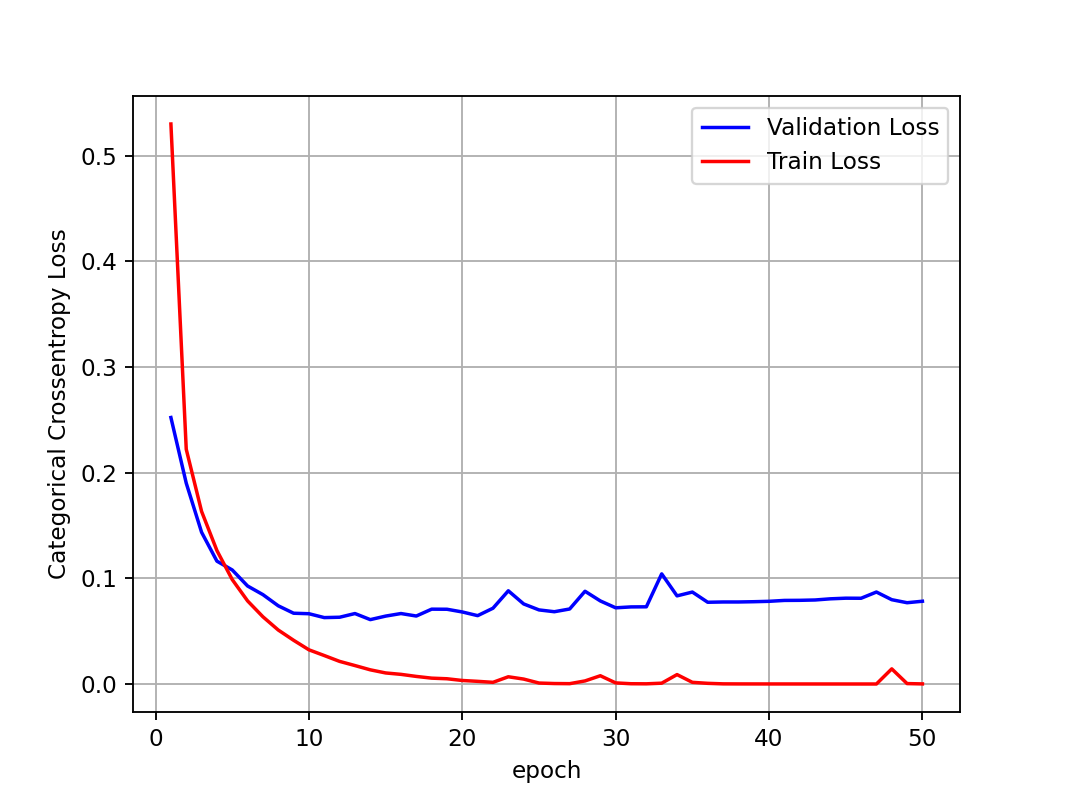

In [22]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


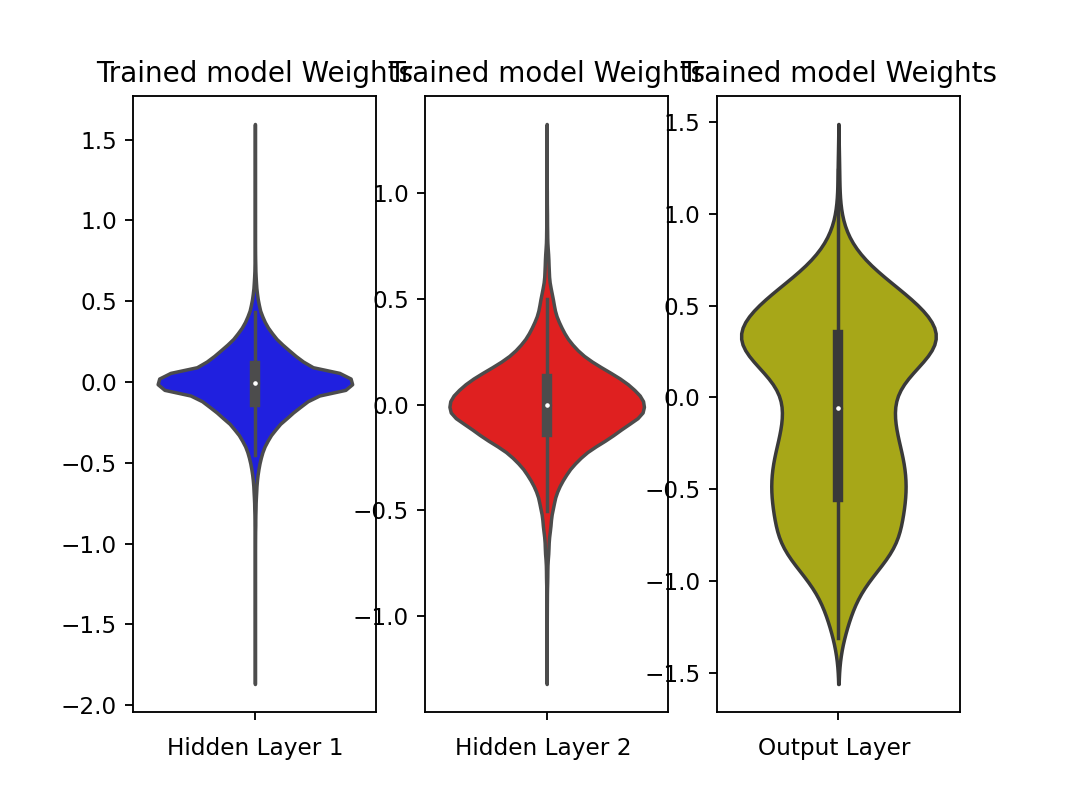

In [23]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU +SGD

In [24]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.7028 - accuracy: 0.8042 - f1_m: 0.7360 - val_loss: 0.3815 - val_accuracy: 0.8947 - val_f1_m: 0.8914
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.9019 - f1_m: 0.9008 - val_loss: 0.2977 - val_accuracy: 0.9143 - val_f1_m: 0.9160
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2855 - accuracy: 0.9178 - f1_m: 0.9185 - val_loss: 0.2618 - val_accuracy: 0.9261 - val_f1_m: 0.9262
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2521 - accuracy: 0.9283 - f1_m: 0.9289 - val_loss: 0.2355 - val_accuracy: 0.9341 - val_f1_m: 0.9339
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2288 - accuracy: 0.9352 - f1_m: 0.9352 - val_loss: 0.2190 - val_accuracy: 0.9390 - val_f1_m: 0.9394
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2110 - accuracy: 0.9400 - f1_m: 0.9408 - val

469/469 [==============================] - 2s 4ms/step - loss: 0.0507 - accuracy: 0.9869 - f1_m: 0.9871 - val_loss: 0.0870 - val_accuracy: 0.9734 - val_f1_m: 0.9745
Epoch 48/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9873 - f1_m: 0.9875 - val_loss: 0.0862 - val_accuracy: 0.9739 - val_f1_m: 0.9745
Epoch 49/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0485 - accuracy: 0.9878 - f1_m: 0.9880 - val_loss: 0.0863 - val_accuracy: 0.9736 - val_f1_m: 0.9742
Epoch 50/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0473 - accuracy: 0.9882 - f1_m: 0.9883 - val_loss: 0.0852 - val_accuracy: 0.9740 - val_f1_m: 0.9744


#### Summary:

    Optimizer = 'sgd' ,
    input activation function = 'relu',
    output activation function = 'softmax' ,
    Model accuracy = 97.40%
    F1 score = 97.44%

Test score: 0.08523381501436234
Test accuracy: 0.9739999771118164


<IPython.core.display.Javascript object>


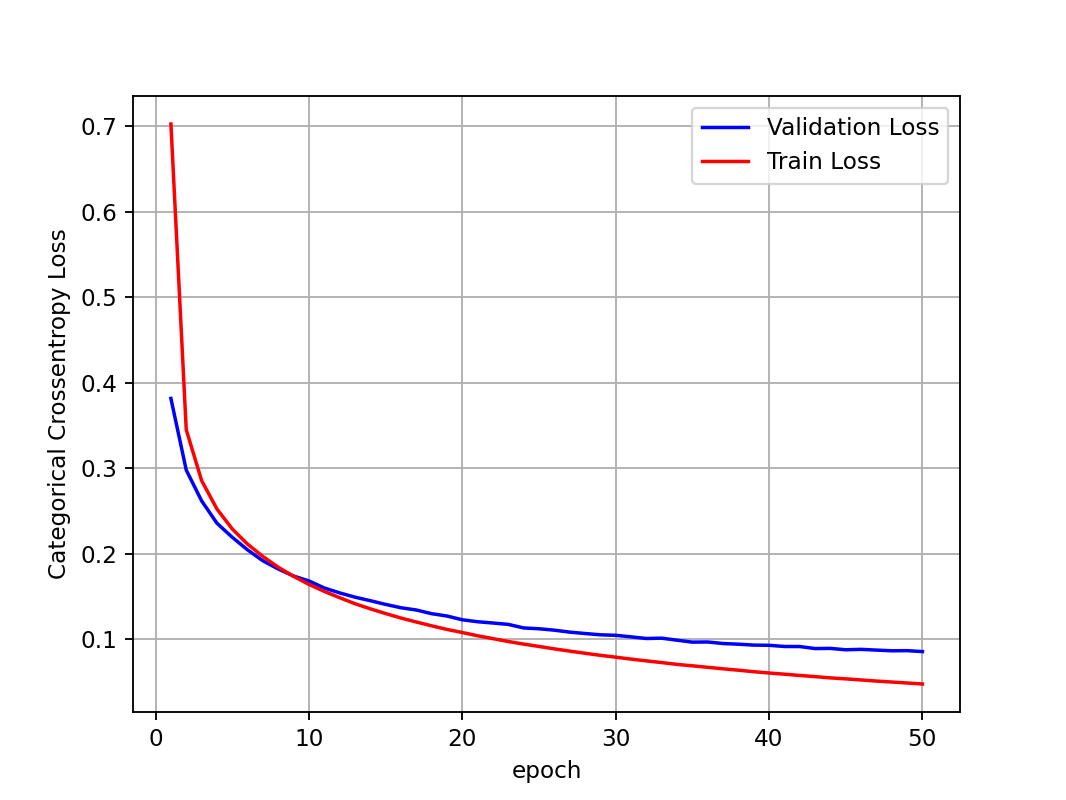

In [26]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


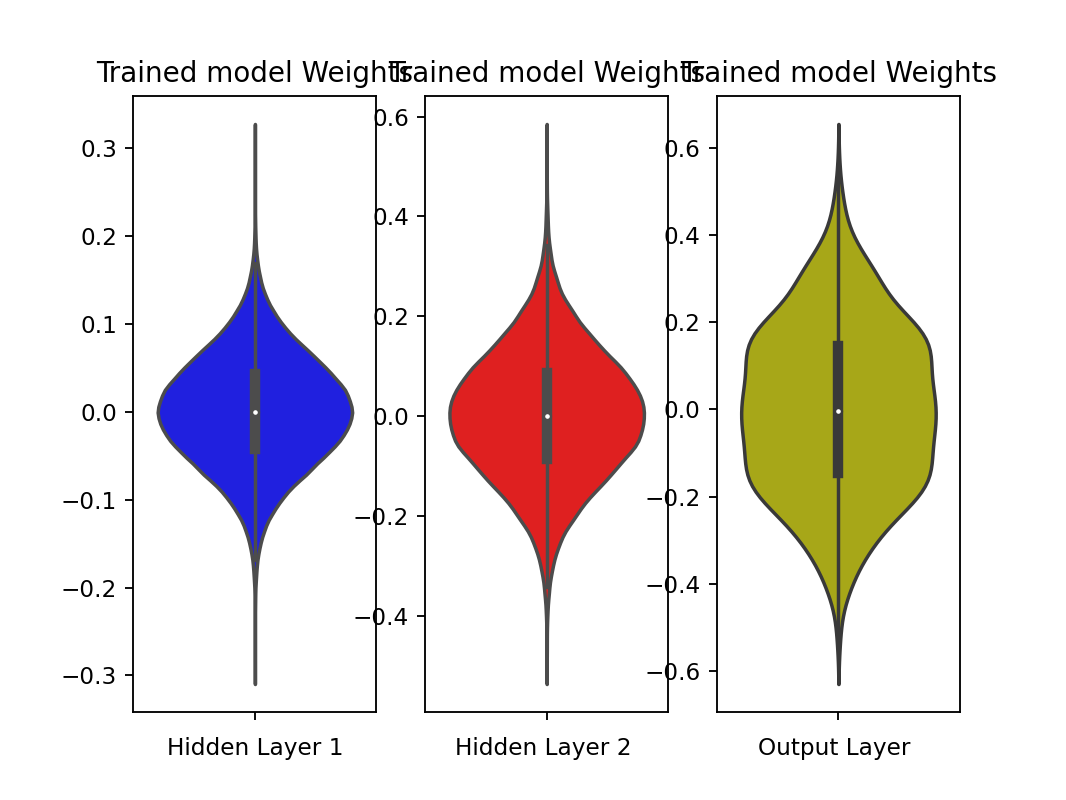

In [27]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM

In [28]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2274 - accuracy: 0.9313 - f1_m: 0.9284 - val_loss: 0.1276 - val_accuracy: 0.9618 - val_f1_m: 0.9624
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9743 - f1_m: 0.9742 - val_loss: 0.0858 - val_accuracy: 0.9734 - val_f1_m: 0.9737
Epoch 3/50
469/469 [=

469/469 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 0.9983 - f1_m: 0.9983 - val_loss: 0.1361 - val_accuracy: 0.9801 - val_f1_m: 0.9804
Epoch 44/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 0.9984 - f1_m: 0.9984 - val_loss: 0.1100 - val_accuracy: 0.9829 - val_f1_m: 0.9832
Epoch 45/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.9990 - f1_m: 0.9990 - val_loss: 0.1177 - val_accuracy: 0.9827 - val_f1_m: 0.9828
Epoch 46/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.9991 - f1_m: 0.9991 - val_loss: 0.1134 - val_accuracy: 0.9832 - val_f1_m: 0.9834
Epoch 47/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - f1_m: 0.9994 - val_loss: 0.1232 - val_accuracy: 0.9822 - val_f1_m: 0.9824
Epoch 48/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0069 - accuracy: 0.9980 - f1_m: 0.9980 - val_loss:

####Summary:

    Optimizer = 'adam' ,
    input activation function = 'relu',
    output activation function = 'softmax' ,
    Model accuracy = 98.03%
    F1 score = 98.06%

Test score: 0.12918290495872498
Test accuracy: 0.9803000092506409


<IPython.core.display.Javascript object>


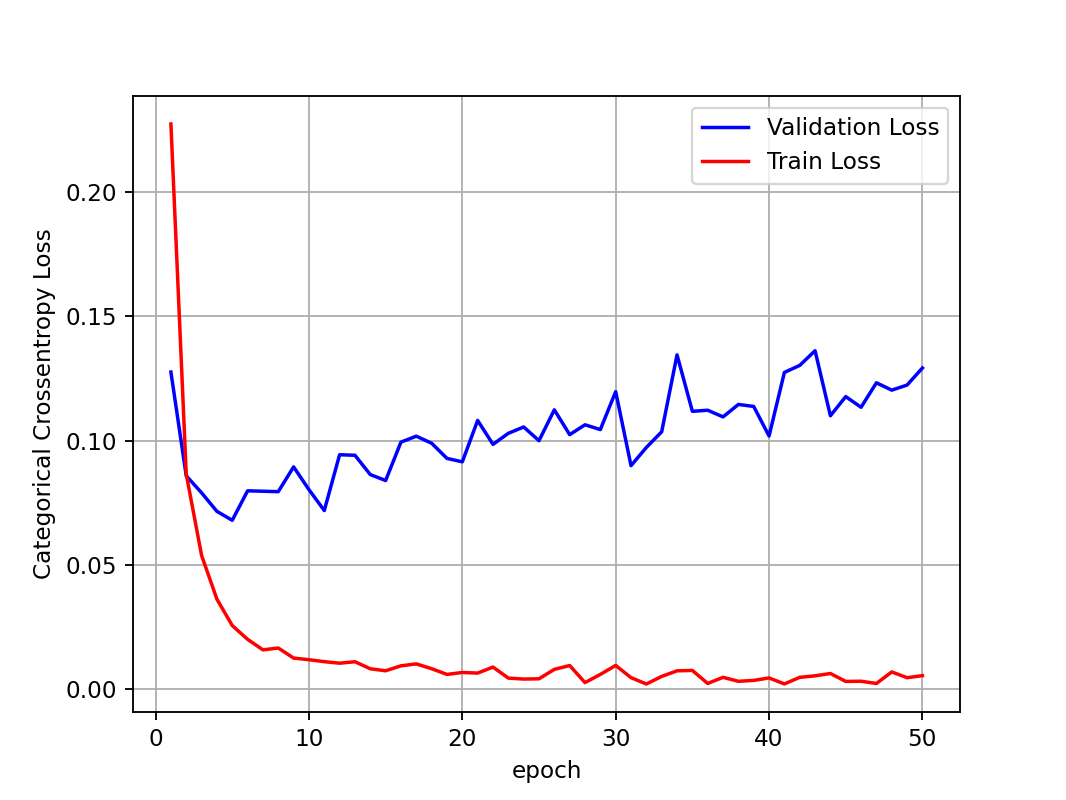

In [29]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


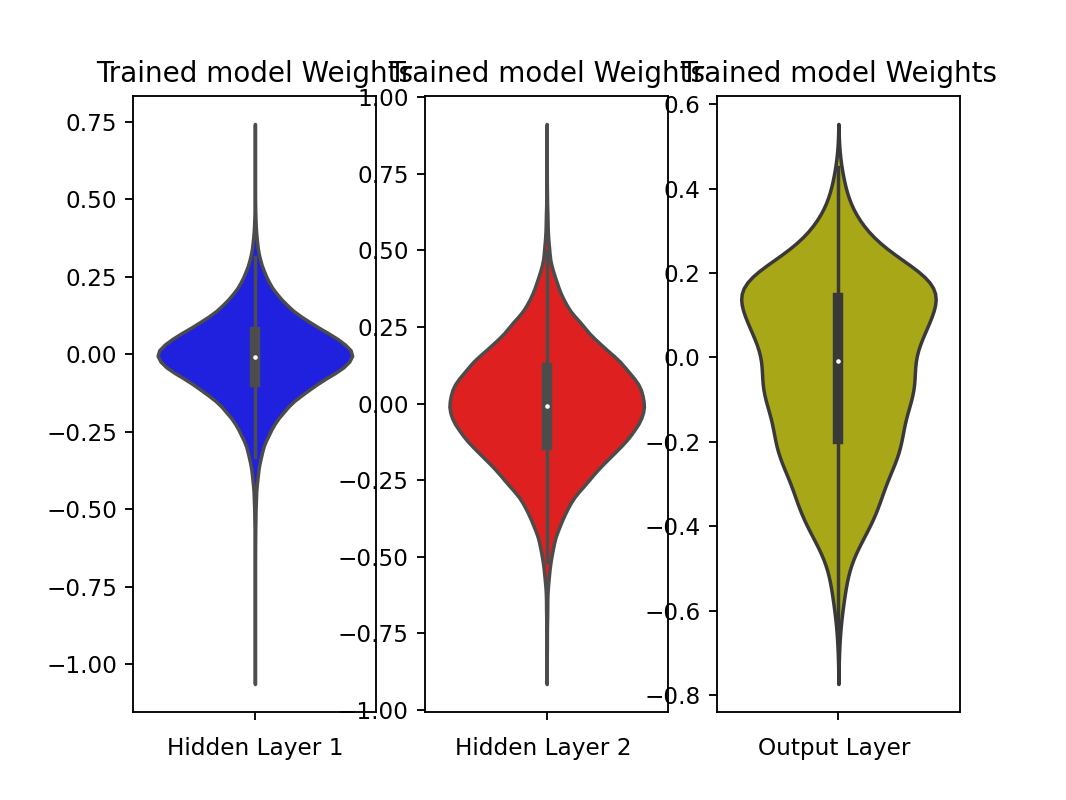

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [31]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [32]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.2979 - accuracy: 0.9111 - f1_m: 0.9122 - val_loss: 0.2129 - val_accuracy: 0.9371 - val_f1_m: 0.9407
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1756 - accuracy: 0.9480 - f1_m: 0.9495 - val_loss: 0.1680 - val_accuracy: 0.9495 - val_f1_m: 0.9505
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1384 - accuracy: 0.9600 - f1_m: 0.9607 - val_loss: 0.1579 - val_accuracy: 0.9514 - val_f1_m: 0.9514
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1151 - accuracy: 0.9657 - f1_m: 0.9666 - val_loss: 0.1433 - val_accuracy: 0.9542 - val_f1_m: 0.9559
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0947 - accuracy: 0.9708 - f1_m: 0.9716 - val_loss: 0.1285 - val_accuracy: 0.9611 - val_f1_m: 0.9618
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0824 - accuracy: 0.9749 - f1_m: 0.9755 - val

469/469 [==============================] - 3s 6ms/step - loss: 0.0054 - accuracy: 0.9981 - f1_m: 0.9981 - val_loss: 0.1000 - val_accuracy: 0.9788 - val_f1_m: 0.9793
Epoch 48/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0056 - accuracy: 0.9981 - f1_m: 0.9981 - val_loss: 0.1007 - val_accuracy: 0.9792 - val_f1_m: 0.9795
Epoch 49/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0053 - accuracy: 0.9984 - f1_m: 0.9984 - val_loss: 0.1001 - val_accuracy: 0.9802 - val_f1_m: 0.9807
Epoch 50/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0064 - accuracy: 0.9977 - f1_m: 0.9977 - val_loss: 0.1133 - val_accuracy: 0.9767 - val_f1_m: 0.9769


####Summary:

    Optimizer = 'adam' ,
    input activation function = 'sigmoid',
    output activation function = 'softmax' ,
    Model accuracy = 97.67%
    F1 score = 97.69%

Test score: 0.1132541373372078
Test accuracy: 0.9767000079154968


<IPython.core.display.Javascript object>


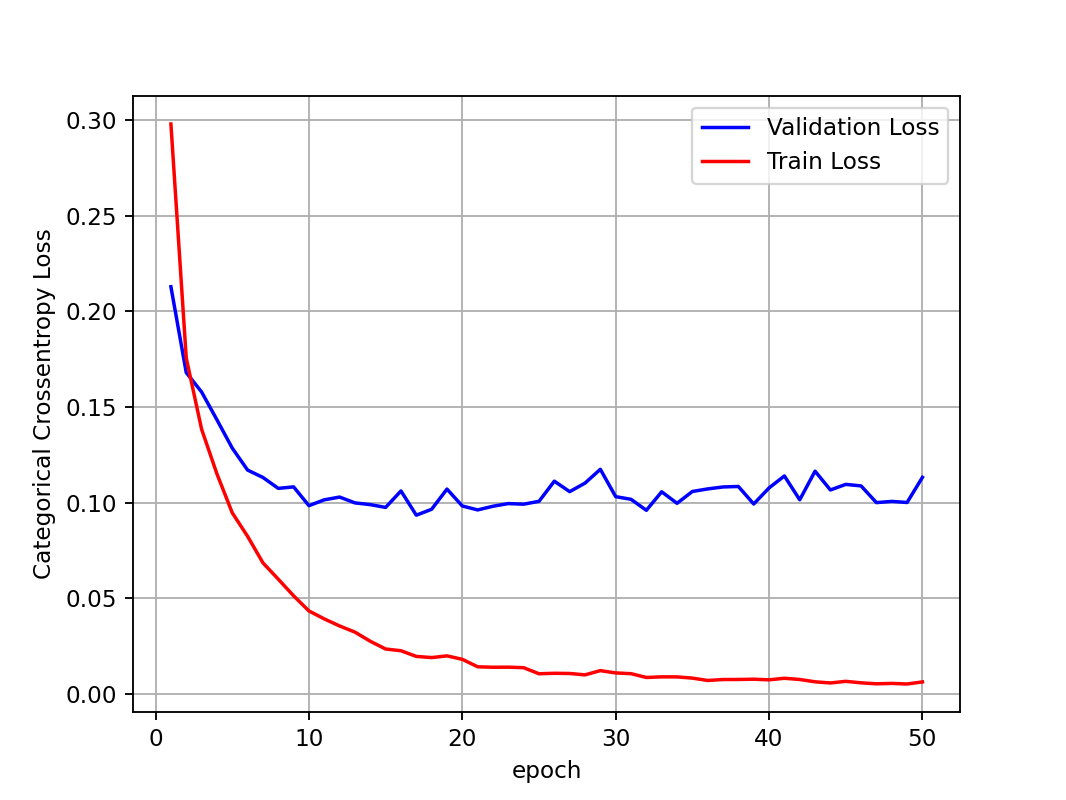

In [33]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


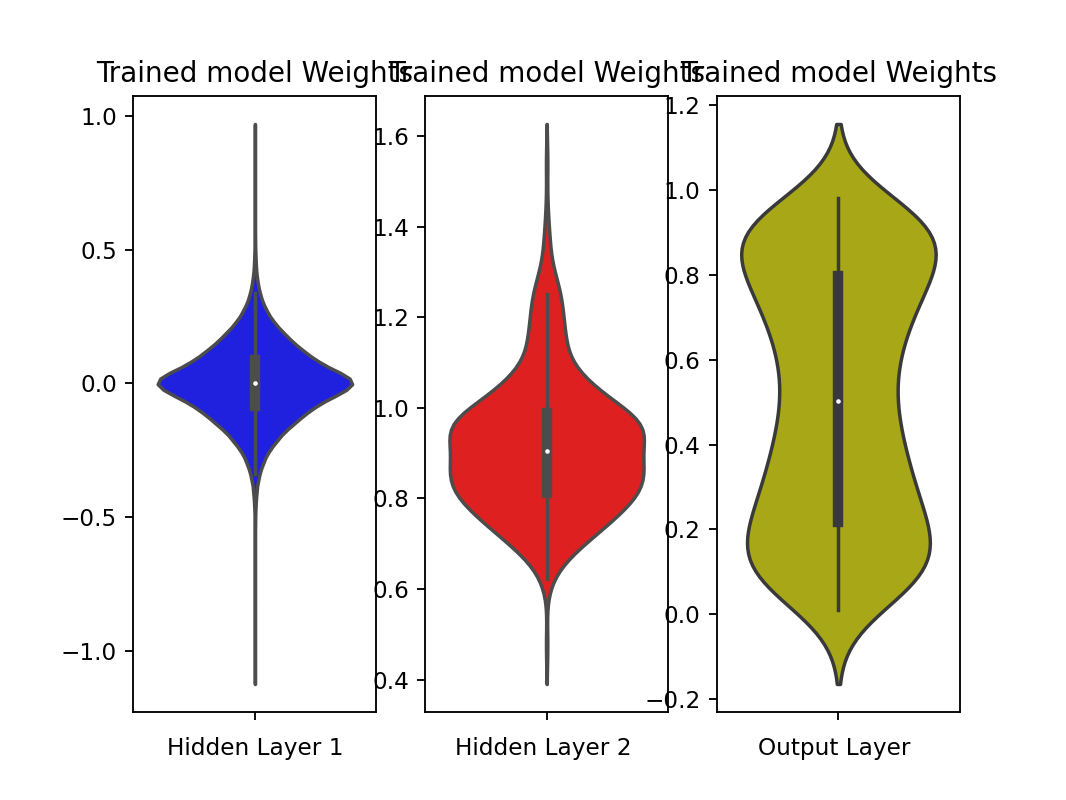

In [34]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Dropout + AdamOptimizer

In [35]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [36]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.6618 - accuracy: 0.7943 - f1_m: 0.7937 - val_loss: 0.2882 - val_accuracy: 0.9139 - val_f1_m: 0.9163
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.4302 - accuracy: 0.8691 - f1_m: 0.8705 - val_loss: 0.2568 - val_accuracy: 0.9267 - val_f1_m: 0.9286
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3838 - accuracy: 0.8848 - f1_m: 0.8865 - val_loss: 0.2412 - val_accuracy: 0.9283 - val_f1_m: 0.9291
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3564 - accuracy: 0.8909 - f1_m: 0.8933 - val_loss: 0.2208 - val_accuracy: 0.9349 - val_f1_m: 0.9361
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3379 - accuracy: 0.8970 - f1_m: 0.8987 - val_loss: 0.2098 - val_accuracy: 0.9386 - val_f1_m: 0.9393
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3236 - accuracy: 0.9023 - f1_m: 0.9036 - val

469/469 [==============================] - 3s 7ms/step - loss: 0.0836 - accuracy: 0.9752 - f1_m: 0.9755 - val_loss: 0.0742 - val_accuracy: 0.9804 - val_f1_m: 0.9804
Epoch 48/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0828 - accuracy: 0.9749 - f1_m: 0.9750 - val_loss: 0.0709 - val_accuracy: 0.9812 - val_f1_m: 0.9818
Epoch 49/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0826 - accuracy: 0.9746 - f1_m: 0.9751 - val_loss: 0.0708 - val_accuracy: 0.9813 - val_f1_m: 0.9820
Epoch 50/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0798 - accuracy: 0.9751 - f1_m: 0.9753 - val_loss: 0.0692 - val_accuracy: 0.9820 - val_f1_m: 0.9821


####Summary:

    Optimizer = 'adam' ,
    input activation function = 'sigmoid',
    output activation function = 'softmax' ,
    dropout = 50%
    Model accuracy = 98.20%
    F1 score = 98.21%

Test score: 0.06916812062263489
Test accuracy: 0.9819999933242798


<IPython.core.display.Javascript object>


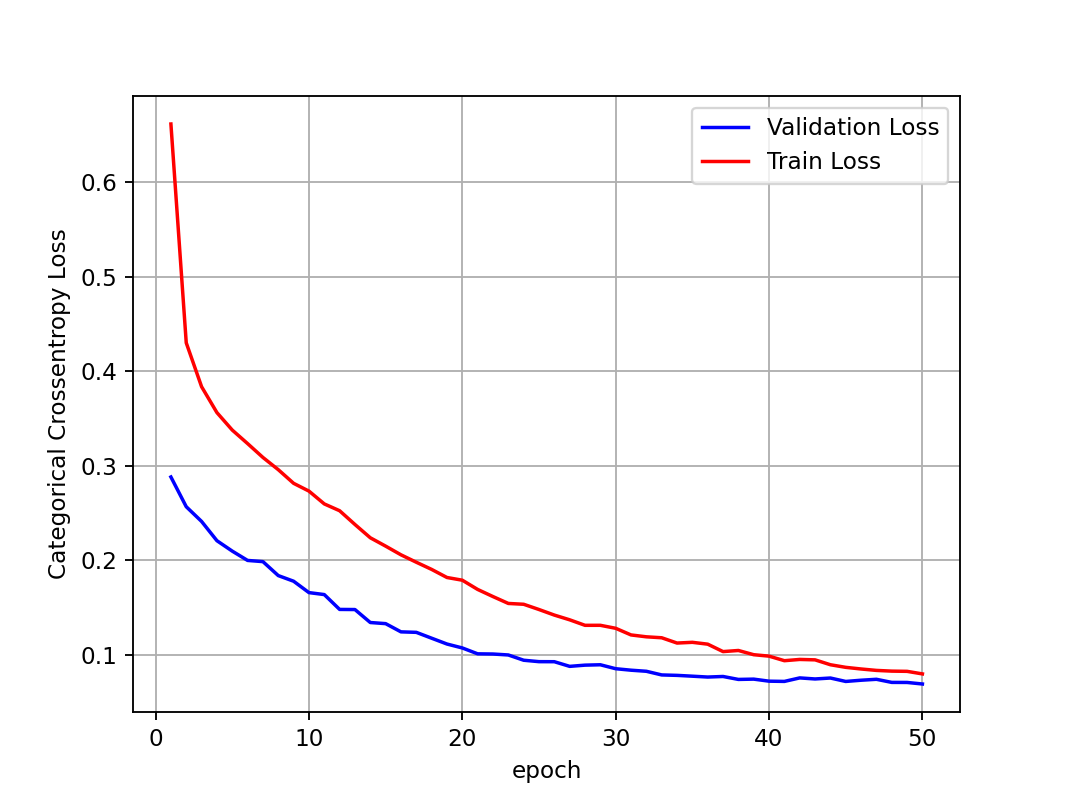

In [37]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


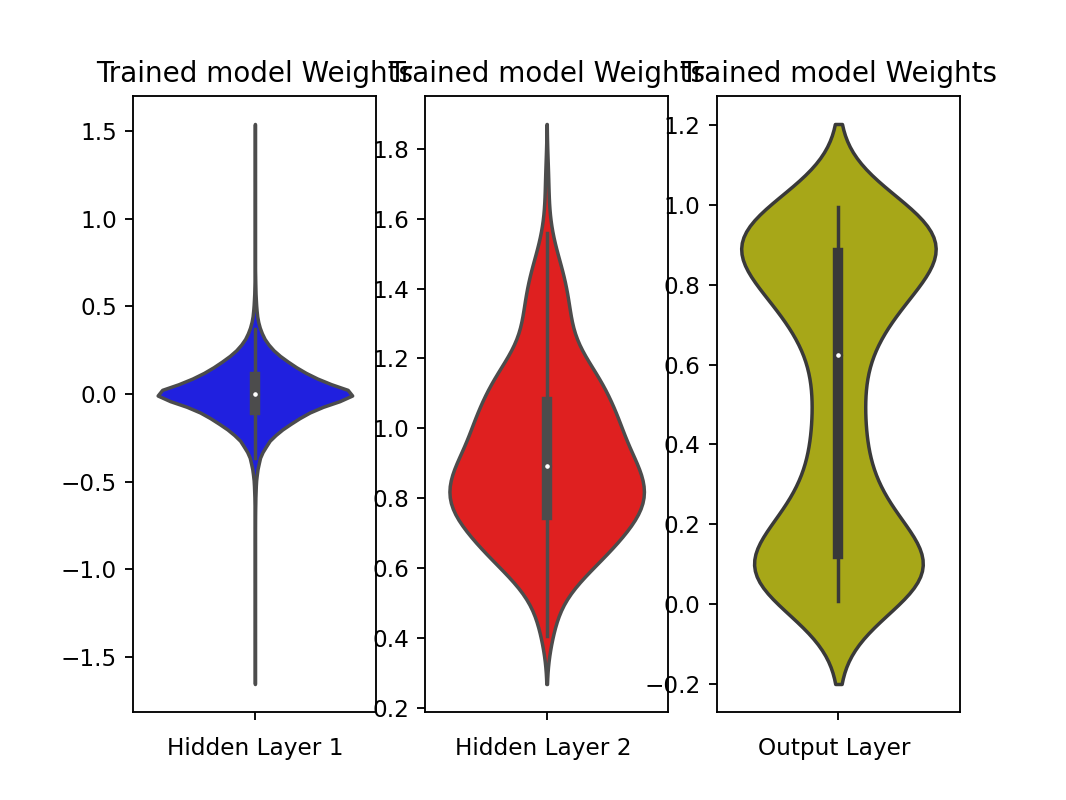

In [38]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Hyper-parameter tuning of Keras models using Sklearn

In [39]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [40]:
activ = ['sigmoid','relu']

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                          verbose=20,  n_iter=10, n_jobs=1)
grid_result = grid.fit(X_train, Y_train)

C:\Users\91974\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START activ=sigmoid...............................................
[CV 1/5; 1/2] END ................activ=sigmoid;, score=0.981 total time= 1.3min
[CV 2/5; 1/2] START activ=sigmoid...............................................
[CV 2/5; 1/2] END ................activ=sigmoid;, score=0.980 total time= 1.4min
[CV 3/5; 1/2] START activ=sigmoid...............................................
[CV 3/5; 1/2] END ................activ=sigmoid;, score=0.980 total time= 1.3min
[CV 4/5; 1/2] START activ=sigmoid...............................................
[CV 4/5; 1/2] END ................activ=sigmoid;, score=0.978 total time= 1.3min
[CV 5/5; 1/2] START activ=sigmoid...............................................
[CV 5/5; 1/2] END ................activ=sigmoid;, score=0.981 total time= 1.3min
[CV 1/5; 2/2] START activ=relu..................................................
[CV 1/5; 2/2] END ...................activ=relu;,

There is a challenge to select proper hyperparameter. We need to choose proper learning rate, number of hidden layers, number of neurons in each layer, activation function.

    We can use RandomizedSearchCV or GridSearchCV for this
    GridSearchCV is computationally expensive as it checks each and every possibile values and apllies all types of combinations for our model.
    Instead of using GridSearchCV, we can use RandomizedSearchCV as it checks by applying some random values and gives the best possible result in a specified range.



In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982600 using {'activ': 'relu'}
0.980000 (0.001283) with: {'activ': 'sigmoid'}
0.982600 (0.001437) with: {'activ': 'relu'}


### Conclusion:

    Models' performance:

        MLP + Sigmoid activation + SGDoptimizer :
            Optimizer = 'sgd' ,
            Input activation function = 'sigmoid',
            Output activation function = 'softmax' ,
            Model accuracy = 98.29
            F1 score = 98.32%

        MLP + Sigmoid activation + ADAM :
            Optimizer = 'adam' ,
            Input activation function = 'sigmoid',
            Output activation function = 'softmax' ,
            Model accuracy = 98.28%
            F1 score = 98.31%

        MLP + ReLU +SGD :
            Optimizer = 'sgd' ,
            Input activation function = 'relu',
            Output activation function = 'softmax' ,
            Model accuracy = 98.44%
            F1 score = 98.47%

        MLP + ReLU + ADAM :
            Optimizer = 'adam' ,
            input activation function = 'relu',
            output activation function = 'softmax' ,
            Model accuracy = 98.01%
            F1 score = 98.06%

        MLP + Batch-Norm on hidden Layers + Adam:
            Optimizer = 'adam' ,
            input activation function = 'sigmoid',
            output activation function = 'softmax' ,
            Model accuracy = 97.81%
            F1 score = 97.82%

        MLP + Dropout + Adam:
            Optimizer = 'adam' ,
            input activation function = 'sigmoid',
            output activation function = 'softmax' ,
            dropout = 50%
            Model accuracy = 98.32%
            F1 score = 98.37%

Model with Sigmoid activation function and softmax optimizer gave the best result
